<a href="https://colab.research.google.com/github/andugu/APA-Laboratory/blob/main/practicaAPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

# If running in local
#%matplotlib notebook

# If running in colab:
%matplotlib inline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names): 
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [144]:
data = pd.read_csv('imports-85.data')
# remove samples without price 
data = data[data['price'] != '?']
# change ? for Nan
data = data.replace('?', np.nan)



# Preprocessing  

1. Apply SimpleInputer to missing value OK 
2. Categorical -> numerical (OrdinalEncoder) OK 
3. Min max scaling OK 
4. Dimensionality reduction OK 
5. Outlier detection OK 
6. Feature extraction new features through transformation (x^2 log(x))
7. Correction of serious skewness and/or kurtosis OK 
8. Parameter search (model testing)

Falta: 
    - Documentació 
    - Model training 

Linear models:
    Linear Regression, KNN, Linear SVM 

Non-Linear models: 
    MLP, RandomForest  

**Add correlation table**

## New features 
Horse power / consum 



In [ ]:
data['price']

Most points are below 20000

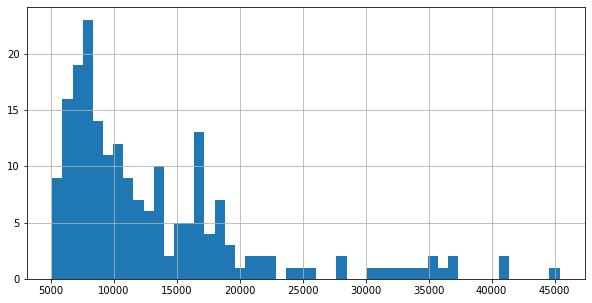

In [ ]:
pd.to_numeric(data['price']).hist(bins=50, figsize=(10, 5))
plt.show()

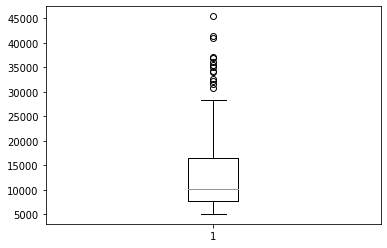

In [ ]:
plt.boxplot(data['price'].astype(float))
plt.show()

In [250]:
3000 / y.mean()

0.2271500429626242

In [16]:
data['price'].mean()
data = data[data['price'].astype(float) < 30000]

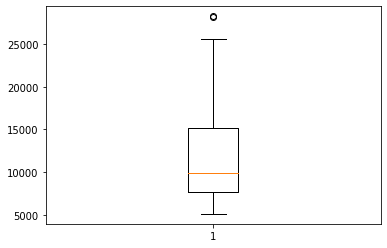

In [17]:
plt.boxplot(data['price'].astype(float))
plt.show()

In [ ]:
price = data['price'].astype(float)
kmeans = KMeans()
pred = kmeans.fit_predict(np.array(price).reshape(-1, 1))
for i in range(8): 
    label = price[pred == i]
    plt.scatter(np.arange(len(label)), price[pred == i])

In [ ]:
kmeans.cluster_centers_

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

8. Missing Attribute Values: (denoted by "?")
   Attribute #:   Number of instances missing a value:
   2.             41
   6.             2
   19.            4
   20.            4
   22.            2
   23.            2
   26.            4

In [145]:
categorical_features = ['make', 'fuel-type', 'aspiration', 
                        'num-of-doors', 'body-style', 
                        'drive-wheels', 'engine-location', 
                        'fuel-system', 'engine-type', 
                        'num-of-cylinders']

prediction_col = 'price'
numerical_features = [col for col in data.columns if not col in categorical_features][:-1]

all_features = numerical_features + categorical_features


categorical_pipeline = Pipeline([('DataframeSelector', DataFrameSelector(categorical_features)), 
                                 ('Inputer', SimpleImputer(strategy='most_frequent')),
                                 ('OrdinalEncoder', OrdinalEncoder()), 
                                 ('MinMaxScaling', MinMaxScaler())])

numerical_pipeline = Pipeline([ ('DataframeSelector', DataFrameSelector(numerical_features)), 
                                ('Inputer', SimpleImputer()),
                                ('MinMaxScaling', MinMaxScaler())])

full_pipeline = FeatureUnion(transformer_list=[
                            ('num_pipeline', numerical_pipeline),
                            ('cat_pipeline', categorical_pipeline)
])

In [146]:
all_features

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'fuel-system',
 'engine-type',
 'num-of-cylinders']

In [147]:
data.columns 

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [148]:
X = np.array(full_pipeline.fit_transform(data))
y = np.array(data[prediction_col].astype(float))

In [ ]:
numerical_features

In [ ]:
data.corr()

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:

kmeans = KMeans()
pred = kmeans.fit_predict(data)
for i in range(8): 
    label = data[pred == i][-1]
    plt.scatter(np.arange(len(label)), label)

plt.show()

In [ ]:
X

array([[ 5.33840604e-04,  2.17095179e-02,  1.57660925e-02, ...,
         8.45154255e-01,  0.00000000e+00,  3.38061702e-01],
       [ 5.33840604e-04,  2.17095179e-02,  1.57660925e-02, ...,
         8.45154255e-01,  0.00000000e+00,  3.38061702e-01],
       [ 1.73873745e-04,  2.12125969e-02,  1.64310689e-02, ...,
         6.45497224e-01,  5.16397779e-01,  3.87298335e-01],
       ...,
       [-1.59241761e-04,  1.51279673e-02,  1.73732762e-02, ...,
         2.22497080e-01,  1.77997664e-01,  1.33498248e-01],
       [-1.72805396e-04,  1.64165126e-02,  1.88530687e-02, ...,
         1.37360564e-01,  9.15737093e-02,  1.37360564e-01],
       [-1.60884390e-04,  1.52840170e-02,  1.75524869e-02, ...,
         2.26107816e-01,  9.04431263e-02,  9.04431263e-02]])

In [122]:
print(X.shape)
print(y.shape)

(201, 25)
(201,)


In [157]:
pca = PCA(n_components=3)
pca.fit(X)
pca.explained_variance_ratio_

array([0.28414794, 0.2081375 , 0.13753728])

## Training

In [257]:
def train_model(model, X, y, k=5):
    history = {} 

    # KFOLD Cross Validation 
    kfold = KFold(n_splits=k, shuffle=True)
    history['mse_train'] = 0
    history['mse_test'] = 0
    history['mae_train'] = 0
    history['mae_test'] = 0
    history['y_pred_train'] = {}
    history['y_pred_test'] = {}
    history['y_train'] = {}
    history['y_test'] = {}

    for fold, indices in enumerate(kfold.split(X)):
        train_index, test_index = indices
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        history['mse_train'] += mean_squared_error(y_train, y_pred_train)
        history['mse_test'] += mean_squared_error(y_test, y_pred_test)
        history['mae_train'] += mean_absolute_error(y_train, y_pred_train)
        history['mae_test'] += mean_absolute_error(y_test, y_pred_test)
        history['y_pred_train'][fold] = y_pred_train
        history['y_pred_test'][fold] = y_pred_test
        history['y_train'][fold] = y_train
        history['y_test'][fold] = y_test
    
    history['mse_train'] /= k
    history['mse_test'] /= k
    history['mae_train'] /= k
    history['mae_test'] /= k

    return history 

def train_grid(model, parameters, X, y, k=5): 
    grid = GridSearchCV(model, param_grid=parameters, n_jobs=4, cv=k)
    grid.fit(X, y)
    best_params = grid.best_params_

    return best_params 
    

### Dimensionality REduction 
We tried different values of PCA  4 is the best value with an explained variance ration of array([0.28414794, 0.2081375 , 0.13753728])

### HyperParameter Tuning

1. Linear Regression: None ASIS
2. KNN: n_neighbors
3. LinearSVM: 
    - Dual=False: Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
    - C Tune with GridSearch
    - Epsilon tune with GridSearch

4. MLP 
    - hidden_layer_sizes
    - solver  => adam (sgd causes inf)
    - alpha => BESTY LOWER
    - learning_rate_init 
    - learning_rate
    - n_iter => big and apply early_stopping

5. RandomForest 
    - max_depth
    - n_estimators 
    - min_samples_leaf


In [183]:
np.linspace(2, 50, 49)

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [244]:

models = {'LinearRegression' : LinearRegression(), 'KNN' : KNeighborsRegressor(),
           'LinearSVM' : LinearSVR(), 'MLP' : MLPRegressor(), 'RandomForest' : RandomForestRegressor()}

parameters = [None, {'n_neighbors': np.linspace(2, 50, 49).astype(np.int32)}, 
              {'C' : [0.1, 10, 100, 500, 800, 1000, 1500,  2000, 5000], 'epsilon' : [0, 0.05, 0.1, 10, 100, 1000, 2500, 5000]},
              {'hidden_layer_sizes': [[100, 100, 100], [5000], [50, 50, 50, 50]], 'alpha' : [0.001], 'max_iter' : [100, 200, 500]},  
              {'max_depth' : [1, 2, 5, 10, 100, 500, None], 'n_estimators' : [10, 25, 50, 100], 
                     'min_samples_leaf' : [1, 5, 10, 15]}]

history = {}
# Dimensionality Reduction 
pca = PCA(n_components=4)
X = pca.fit_transform(X)
# Search best parameters 
best_params = {}
for p, key in zip(parameters, models.keys()):
    print('Searching best parameters', key)
    if p:
        best_params[key] = train_grid(models[key], p, X, y)
    else:
        best_params[key] = None
 


Searching best parameters LinearRegression
Searching best parameters KNN
Searching best parameters LinearSVM
Searching best parameters MLP


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Searching best parameters RandomForest


In [245]:
best_params

{'KNN': {'n_neighbors': 38},
 'LinearRegression': None,
 'LinearSVM': {'C': 800, 'epsilon': 1000},
 'MLP': {'alpha': 0.001,
  'hidden_layer_sizes': [50, 50, 50, 50],
  'max_iter': 200},
 'RandomForest': {'max_depth': None,
  'min_samples_leaf': 1,
  'n_estimators': 100}}

In [258]:
for key in models.keys():
    print('Training model', key)
    if best_params[key]: 
        models[key].set_params(**best_params[key])
    history[key] = train_model(models[key], X, y)

Training model LinearRegression
Training model KNN
Training model LinearSVM
Training model MLP


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training model RandomForest


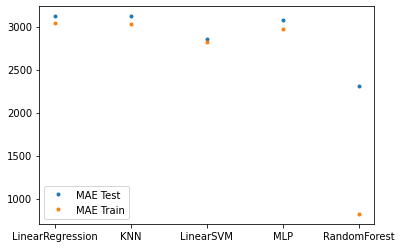

In [247]:
mae_train = np.array([[key, history[key]['mae_train']] for key in models.keys()])
mae_test = np.array([[key, history[key]['mae_test']] for key in models.keys()])

x_length = range(len(mae_test))
plt.plot(x_length, mae_test[:, 1].astype(np.float32), '.', label='MAE Test')
plt.plot(x_length, mae_train[:, 1].astype(np.float32), '.', label='MAE Train')
plt.legend(loc='lower left')
plt.xticks(x_length, mae_test[:, 0])
plt.show()

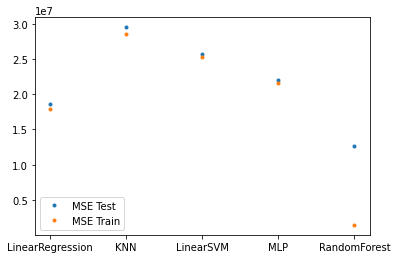

In [248]:
mse_train = np.array([[key, history[key]['mse_train']] for key in models.keys()])
mse_test = np.array([[key, history[key]['mse_test']] for key in models.keys()])

x_length = range(len(mae_test))
plt.plot(x_length, mse_test[:, 1].astype(np.float32), '.', label='MSE Test')
plt.plot(x_length, mse_train[:, 1].astype(np.float32), '.', label='MSE Train')
plt.legend(loc='lower left')
plt.xticks(x_length, mae_test[:, 0])
plt.show()

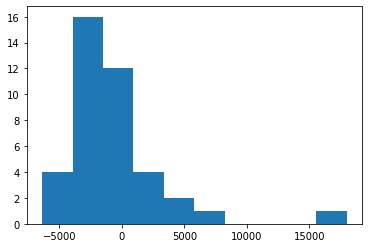

In [264]:
plt.hist(history['MLP']['y_test'][2] - history['MLP']['y_pred_test'][2])
plt.show()

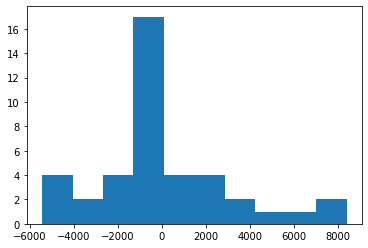

In [261]:
plt.hist(history['RandomForest']['y_test'][0] - history['RandomForest']['y_pred_test'][0])
plt.show()